### A  2-D diffusion model
A very simple diffusion simulation can be constructed in two dimensions by following the positions of a number of "particles" which all start off at the centre of a grid of cells. Time is assumed to progress in a series of "ticks": at each tick, each particle's position changes at random by −1, 0, or +1 cells in each of the x and y directions. Over time, the initial spike in particle density spreads out in the grid. The simulation is only a qualitative approximation to real diffusion because of the nine different movements a particle can make, one involves the particle not moving at all (i.e. a displacement of (0,0)) and the distances moved in the other eight are not all the same (compare, e.g. (+1,0) and (+1,+1)).
The result is very pleasing enough.

20 / 200


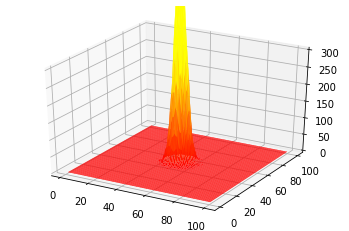

40 / 200
60 / 200
80 / 200
100 / 200
120 / 200
140 / 200
160 / 200
180 / 200
200 / 200


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import  colors

# (Square) grid side length.
m = 100
# Maximum numbter of iterations.
nitmax = 200
# Number of particles in the simulation.
nparticles = 50000
# Output a frame (plot image) every nevery iterations.
nevery = 20
# Constant maximum value of z-axis value for plots.
zmax = 300

# Create the 3D figure object.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# We'll need a meshgrid to plot the surface: this is X, Y.
x = y = np.linspace(1,m,m)
X, Y = np.meshgrid(x, y)

# vmin, vmax set the minimum and maximum values for the colormap. This is to
# be fixed for all plots, so define a suitable norm.
vmin, vmax = 0, zmax
norm = colors.Normalize(vmin=vmin, vmax=vmax)

# Initialize the location of all the particles to the centre of the grid.
locs = np.ones((nparticles, 2), dtype=int) * m//2


# Iterate for nitmax cycles.
for j in range(nitmax):
    # Update the particles' locations at random. Particles move at random to
    # an adjacent grid cell. We're going to be pretty relaxed about the ~11%
    # probability that a particle doesn't move at all (displacement of (0,0)).
    locs += np.random.randint(-1, 2, locs.shape)
    if not (j+1) % nevery:
        
        # Create an updated grid and plot it.
        grid = np.zeros((m, m))
        for i in range(nparticles):
            x, y = locs[i]
            
            # Add a particle to the grid if it is actually on the grid!
            if 0 <= x < m and 0 <= y < m:
                grid[x, y] += 1
        print(j+1,'/',nitmax)
        
        # Now clear the Axes of any previous plot and make a new surface plot.
        ax.clear()
        ax.plot_surface(X, Y, grid, rstride=1, cstride=1, cmap=plt.cm.autumn,
                        linewidth=1, vmin=vmin, vmax=vmax, norm=norm)
        ax.set_zlim(0, zmax)       
        plt.show()